# Data analysis task

-----------------
## Research question

In recent years, the world has witnessed many claims and commitments in the direction of carbon neutrality. For example, the EU produced an action plan to [become carbon carbon neutral by 2050](https://climateactiontracker.org/countries/eu/), with USA having the [exact same target](https://www.whitehouse.gov/wp-content/uploads/2021/10/US-Long-Term-Strategy.pdf). In the mean time, other countries with the highest populations on the planet such as [China](https://climateactiontracker.org/countries/china/net-zero-targets/) and [India](https://climateactiontracker.org/countries/india/net-zero-targets/) are keeping their distance and only vaguely agree to carbon neutrality targets, proposing claims to become carbon neutral in 2060 or 2070. This brings me to the question - where in the world is CO2 production so high that carbon neutrality action plans are needed the most? To answer this question, I must ask another question:  

**In the present, which countries are the biggest CO2 producers on the planet? And which are the biggest CO2 producers per capita?**  

Let's dive into the data!

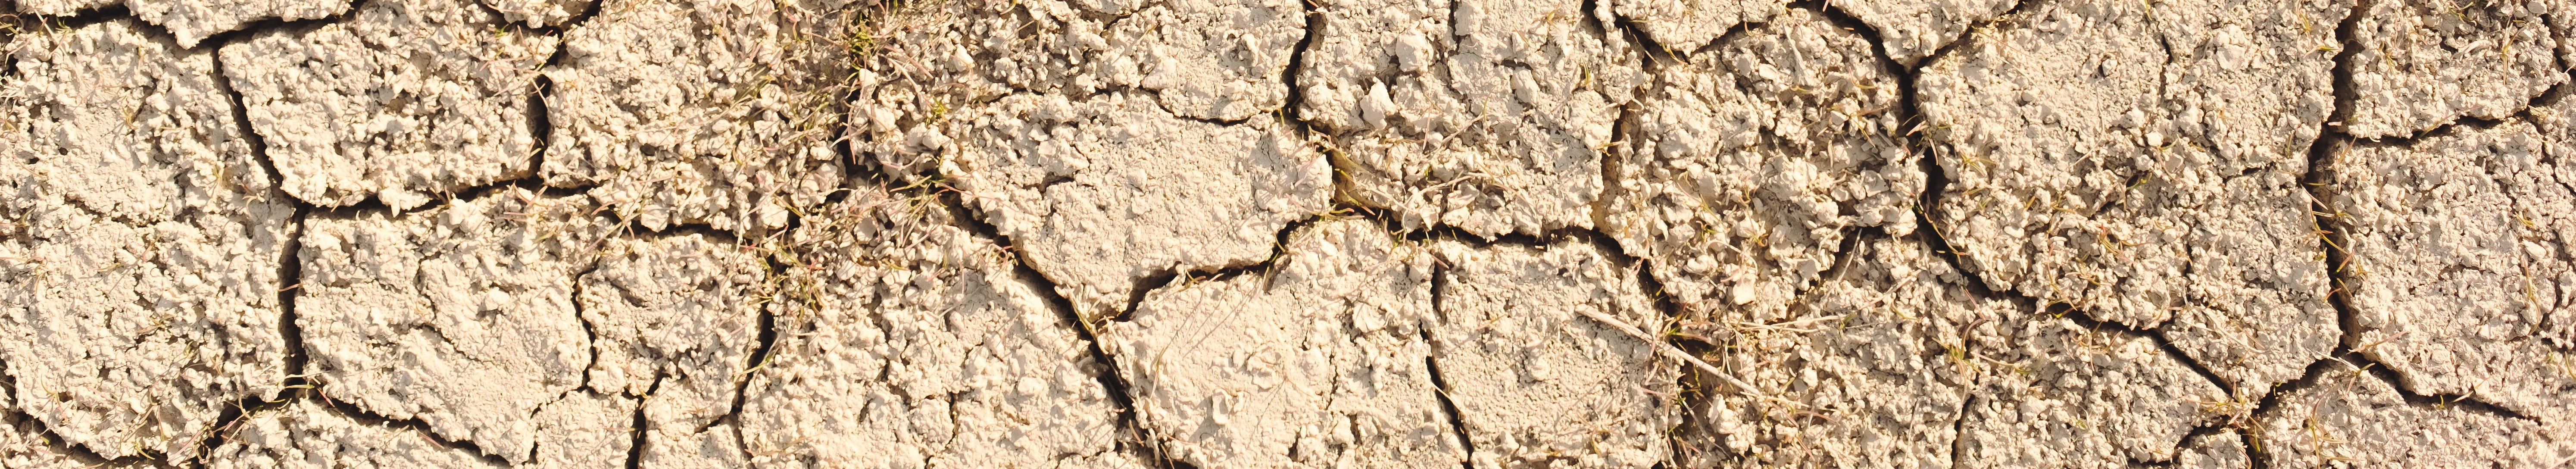

-------------------------
## Data analysis

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [5]:
# load SDG dataset to pandas
data_dir = os.path.join('data', 'original raw', 'last decade')
sdg_path = os.path.join(data_dir, 'sdg_data.xlsx')

print('Reading SDG dataset ...')
sdg_dataset = pd.read_excel(sdg_path)
print('Done.')

Reading SDG dataset ...
Done.


In [6]:
# explore SDG dataset
sdg_dataset.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   
1            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
2  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
3  Access to electricity, urban (% of urban popul...  EG.ELC.ACCS.UR.ZS   
4  Account ownership at a financial institution o...     FX.OWN.TOTL.ZS   

      YR2010     YR2011     YR2012     YR2013     YR2014     YR2015  \
0         20       21.8         23       24.8       26.1       27.4   
1  42.700001  43.222019  69.099998  68.290649       89.5       71.5   
2    30.2188   29.57288  60.849155  60.566135  86.500511  64.573357   
3  82.800003   86.56778         95  92.259048  98.699997       92.5   
4         ..       9.01         ..         ..       9.96         ..   

      YR2016     YR2017     YR2018     YR2019     YR2020  
0       28.6       29.7       30.9       31.9       33.2  
1  97.699997  97.699997  96.616135  97.699997  97.699997  
2  97.099358  97.091972  95.586174   97.07563  97.066711  
3       99.5       99.5  99.626022       99.5       99.5  
4         ..      14.89         ..         ..         ..

In [7]:
# print all series names
all_series_names = sdg_dataset['Series Name'].unique()
print(all_series_names)

['Access to clean fuels and technologies for cooking (% of population)'
 'Access to electricity (% of population)'
 'Access to electricity, rural (% of rural population)'
 'Access to electricity, urban (% of urban population)'
 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)'
 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)'
 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)'
 'Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)'
 'Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)'
 'Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+)'
 'Account owner

In [8]:
# series related to CO2 emissions:
series_related_to_co2 = [series_name for series_name in all_series_names if 'CO2' in str(series_name)]
print('Series related to CO2 emissions:')
for series_name in series_related_to_co2:
    print(series_name)

Series related to CO2 emissions:
CO2 emissions (kg per 2015 US$ of GDP)
CO2 emissions (kg per 2017 PPP $ of GDP)
CO2 emissions (kg per PPP $ of GDP)
CO2 emissions (metric tons per capita)


In this analysis, I will focus on emissions given in metric tons per capita since this is the most easily interpretable parameter.

In [9]:
# the most recent data is from 2020
sdg_dataset[['Series Name', 'YR2020']]

Series Name     YR2020
0       Access to clean fuels and technologies for coo...       33.2
1                 Access to electricity (% of population)  97.699997
2       Access to electricity, rural (% of rural popul...  97.066711
3       Access to electricity, urban (% of urban popul...       99.5
4       Account ownership at a financial institution o...         ..
...                                                   ...        ...
106488                                                NaN        NaN
106489                                                NaN        NaN
106490                                                NaN        NaN
106491                                                NaN        NaN
106492                                                NaN        NaN

[106493 rows x 2 columns]

In [10]:
# however, the column of 2020 data from the World Data Bank is missing CO2 information from 2020
sdg_2020_unique_co2_values = sdg_dataset[sdg_dataset['Series Name'] == 'CO2 emissions (metric tons per capita)']['YR2020'].unique()
sdg_2019_unique_co2_values = sdg_dataset[sdg_dataset['Series Name'] == 'CO2 emissions (metric tons per capita)']['YR2019'].unique()

print(f'Number of unique CO2 data points provided by the World Data Bank from 2020: {len(sdg_2020_unique_co2_values)}, being data points = {sdg_2020_unique_co2_values}.')
print(f'Number of unique CO2 data points provided by the World Data Bank from 2019: {len(sdg_2019_unique_co2_values)}.')

Number of unique CO2 data points provided by the World Data Bank from 2020: 1, being data points = ['..'].
Number of unique CO2 data points provided by the World Data Bank from 2019: 234.


Based on the fact that the World Data Bank does not have the data of CO2 production from 2020, the most recent year were this data is available is 2019. Therefore, the analysis is built on data from 2019.

In [11]:
# drop all years except for most recent
columns_present = sdg_dataset.columns
columns_to_keep = ['Country Name', 'Series Name', 'YR2019']
columns_to_drop = list(set(columns_present) - set(columns_to_keep))
print(f'Columns of the new dataframe: {columns_to_keep}')
sdg_2019 = sdg_dataset.drop(columns=columns_to_drop, axis='columns')

Columns of the new dataframe: ['Country Name', 'Series Name', 'YR2019']


To clean the data, missing values ('..') are replaced by numpy nan values and can than be dropped.

In [12]:
# clean data
print(f'Dataset dimensions before cleaning: {sdg_2019.shape}')
sdg_2019 = sdg_2019.replace('..', np.nan)
sdg_2019 = sdg_2019.dropna()
print(f'Dataset dimensions after cleaning: {sdg_2019.shape}')

Dataset dimensions before cleaning: (106493, 3)
Dataset dimensions after cleaning: (46180, 3)


In [13]:
# create pivot table
sdg_2019_pivot = sdg_2019.pivot_table(index='Country Name', columns='Series Name', values='YR2019', aggfunc='mean')
sdg_2019_pivot.head()

Series Name     Access to clean fuels and technologies for cooking (% of population)  \
Country Name                                                                           
Afghanistan                                                  31.9                      
Albania                                                      80.7                      
Algeria                                                      99.7                      
American Samoa                                                NaN                      
Andorra                                                     100.0                      

Series Name     Access to electricity (% of population)  \
Country Name                                              
Afghanistan                                   97.699997   
Albania                                      100.000000   
Algeria                                       99.500000   
American Samoa                                      NaN   
Andorra                                      100.000000   

Series Name     Access to electricity, rural (% of rural population)  \
Country Name                                                           
Afghanistan                                             97.075630      
Albania                                                100.000000      
Algeria                                                 98.681053      
American Samoa                                                NaN      
Andorra                                                100.000000      

Series Name     Access to electricity, urban (% of urban population)  \
Country Name                                                           
Afghanistan                                             99.500000      
Albania                                                100.000000      
Algeria                                                 99.800003      
American Samoa                                                NaN      
Andorra                                                100.000000      

Series Name     Adjusted net savings, excluding particulate emission damage (% of GNI)  \
Country Name                                                                             
Afghanistan                                                   NaN                        
Albania                                                 -2.080374                        
Algeria                                                 21.440253                        
American Samoa                                                NaN                        
Andorra                                                       NaN                        

Series Name     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Country Name                                                                    
Afghanistan                                               61.3250               
Albania                                                   19.5028               
Algeria                                                    9.5966               
American Samoa                                                NaN               
Andorra                                                       NaN               

Series Name     Adolescents out of school (% of lower secondary school age)  \
Country Name                                                                  
Afghanistan                                                   NaN             
Albania                                                   3.69733             
Algeria                                                       NaN             
American Samoa                                                NaN             
Andorra                                                       NaN             

Series Name     Adolescents out of school, female (% of female lower secondary school age)  \
Country Name                                                                                 
Afghanistan       

In [14]:
# explore CO2 emissions in 2019
sdg_2019_emissions = sdg_2019_pivot['CO2 emissions (metric tons per capita)']
countries_to_show_emissions = ['United States', 'China', 'India', 'Slovak Republic', 'Czech Republic', 'Norway', 'Japan', 'Singapore', 'Brazil', 'Nigeria', 'Iraq']

print('CO2 emissions in 2019 for a few selected countries (CO2 metric tons per capita):\n')
for country in countries_to_show_emissions:
    print(f'{country}: {sdg_2019_emissions[country]:.2f}')

CO2 emissions in 2019 for a few selected countries (CO2 metric tons per capita):

United States: 14.67
China: 7.61
India: 1.80
Slovak Republic: 5.70
Czech Republic: 9.02
Norway: 6.72
Japan: 8.54
Singapore: 8.31
Brazil: 2.06
Nigeria: 0.57
Iraq: 4.44


To find out the emissions per capita for countries with population larger than threshold and also to find out the total CO2 emissions in metric tons, data about total population is needed. However, this information is missing in the SDG dataset. Therefore, I downloaded a new dataset from the World Data Bank - ["Population Estimates and Projections"](https://databank.worldbank.org/source/population-estimates-and-projections). The same approach is applied to the dataset, in a single cell.

In [15]:
# load poopulation dataset
pop_path = os.path.join(data_dir, 'population_data.xlsx')
print('Reading popoulation dataset ...')
pop_dataset = pd.read_excel(pop_path, na_values='..')
print('Done.')

# get rid of unneccessary data
columns_present = pop_dataset.columns
columns_to_keep = ['Country Name', 'Series Name', 'YR2019']
columns_to_drop = list(set(columns_present) - set(columns_to_keep))
pop_2019 = pop_dataset.drop(columns=columns_to_drop, axis='columns')

# clean data
pop_2019 = pop_2019.dropna()

# create pivot table
pop_2019['YR2019'] = pop_2019['YR2019'].astype(float)
pop_2019_pivot = pop_dataset.pivot_table(index='Country Name', columns='Series Name', values='YR2019', aggfunc='mean')
population_2019 = pop_2019_pivot['Population, total']

# print an example of the population dataset
print('Example total population dataset in 2019:')
population_2019_show = population_2019.apply(lambda x: f'{x/1e6:.1f} million')
population_2019_show.head()

Reading popoulation dataset ...
Done.
Example total population dataset in 2019:


Country Name
Afghanistan                     37.8 million
Africa Eastern and Southern    667.2 million
Africa Western and Central     454.3 million
Albania                          2.9 million
Algeria                         42.7 million
Name: Population, total, dtype: object

In [16]:
# highest CO2 emissions (metric tons per capita) - show only countries/regions with population higher than 3 million
temp_df = pd.concat([sdg_2019_emissions.sort_values(ascending=False), population_2019], axis=1)
temp_df = temp_df[temp_df['Population, total'] > 3e6]
sdg_2019_emissions = temp_df['CO2 emissions (metric tons per capita)']
print('Countries with the highest CO2 production per capita (min country population: 3 000 000 inhabitants)')
print(sdg_2019_emissions.sort_values(ascending=False).round(2).head(30))

Countries with the highest CO2 production per capita (min country population: 3 000 000 inhabitants)
Country Name
Kuwait                                           22.02
United Arab Emirates                             19.33
Canada                                           15.43
Saudi Arabia                                     15.28
Oman                                             15.28
Australia                                        15.24
North America                                    14.75
United States                                    14.67
Turkmenistan                                     12.26
Korea, Rep.                                      11.80
Russian Federation                               11.80
Kazakhstan                                       11.46
High income                                       9.82
Post-demographic dividend                         9.52
Japan                                             8.54
OECD members                                      8.50
Nether

In [17]:
# CO2 metric tons in 2019 = CO2 metric tons per capita in 2019 * population in 2019
sdg_2019_emissions_metric_tons = pd.concat([sdg_2019_emissions, population_2019], axis=1)
sdg_2019_emissions_metric_tons = sdg_2019_emissions_metric_tons['CO2 emissions (metric tons per capita)']*sdg_2019_emissions_metric_tons['Population, total']
print('CO2 emissions in metric tons:')
sdg_2019_emissions_metric_tons = sdg_2019_emissions_metric_tons.dropna()
sdg_2019_emissions_metric_tons_show = sdg_2019_emissions_metric_tons.apply(lambda x: f'{x/1e6:.1f} million')
sdg_2019_emissions_metric_tons_show.head(10)

CO2 emissions in metric tons:


Country Name
Kuwait                    97.8 million
United Arab Emirates     178.1 million
Canada                   580.2 million
Saudi Arabia             547.6 million
Oman                      70.3 million
Australia                386.1 million
North America           5399.7 million
United States           4817.7 million
Turkmenistan              75.5 million
Korea, Rep.              610.8 million
dtype: object

In [18]:
# highest CO2 emissions (metric tons) - regions and countries
sdg_2019_emissions_metric_tons = sdg_2019_emissions_metric_tons.sort_values(ascending=False)
sdg_2019_emissions_metric_tons_show = sdg_2019_emissions_metric_tons.apply(lambda x: f'{x/1e6:.1f} million')
sdg_2019_emissions_metric_tons_show.head(30)

Country Name
World                                                 34607.2 million
IDA & IBRD total                                      22642.5 million
Low & middle income                                   22105.2 million
Middle income                                         21875.2 million
Upper middle income                                   15939.3 million
Late-demographic dividend                             15506.0 million
East Asia & Pacific                                   15293.6 million
East Asia & Pacific (excluding high income)           12507.9 million
High income                                           12135.8 million
OECD members                                          11590.6 million
China                                                 10707.2 million
Post-demographic dividend                             10604.0 million
Early-demographic dividend                             7555.0 million
Europe & Central Asia                                  6058.4 million
Lower m

In [19]:
# highest CO2 emissions (metric tons) - only countries
drop_regions = ['World', 'IDA & IBRD total', 'Middle income', 'Low & middle income', 'Upper middle income', 'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'High income', 'OECD members', 'Post-demographic dividend', 'Early-demographic dividend', 'Europe & Central Asia', 'Lower middle income', 'North America', 'Europe & Central Asia (excluding high income)', 'South Asia (IDA & IBRD)', 'South Asia', 'Middle East & North Africa', 'Euro area', 'Latin America & Caribbean', 'Middle East & North Africa (excluding high income)', 'Latin America & Caribbean (excluding high income)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Central Europe and the Baltics', 'Arab World', 'Pre-demographic dividend', 'Least developed countries: UN classification', 'European Union', 'Small states', 'Heavily indebted poor countries (HIPC)', 'Low income', 'Other small states']
sdg_2019_emissions_metric_tons_show = sdg_2019_emissions_metric_tons_show.drop(index=drop_regions)
sdg_2019_emissions_metric_tons_pie = sdg_2019_emissions_metric_tons.drop(index=drop_regions)
sdg_2019_emissions_metric_tons_show.head(20)

Country Name
China                 10707.2 million
United States          4817.7 million
India                  2486.3 million
Russian Federation     1703.6 million
Japan                  1081.6 million
Iran, Islamic Rep.      657.7 million
Germany                 657.4 million
Indonesia               617.5 million
Korea, Rep.             610.8 million
Canada                  580.2 million
Saudi Arabia            547.6 million
Mexico                  440.5 million
South Africa            436.1 million
Brazil                  435.8 million
Australia               386.1 million
United Kingdom          348.9 million
Vietnam                 334.1 million
Italy                   317.2 million
France                  301.1 million
Poland                  295.1 million
dtype: object

----
## Answer to the research question
With the data analysis provided, it is now possible to answer the research question. To recap, the research question is:

**In the present, which countries are the biggest CO2 producers on the planet?**  
Answer:

1. China, 10.7 billion tons of CO2
2. The United States of America, 4.8 billion tons of CO2
3. India, 2.5 billion tons of CO2
4. Russian Federation, 1.7 billion tons of CO2
5. Japan, 1.1 billion tons of CO2


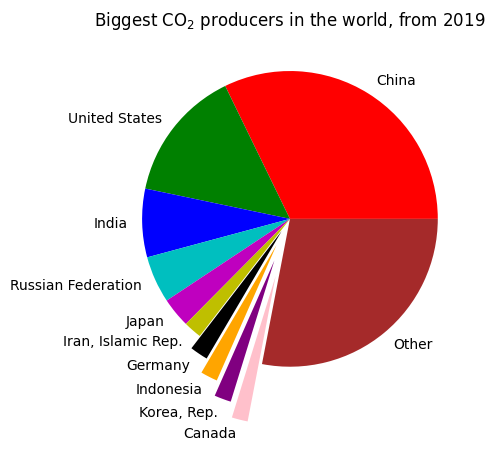

In [20]:
# plot a pie chart
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown']
s = sdg_2019_emissions_metric_tons_pie
n = 10 # show top n countries in pie chart
remaining = s.iloc[n:].sum()  # sum of the remaining entries
s = s.iloc[:n]  # keep only the top n entries
s = pd.concat([s, pd.Series([remaining], index=['Other'])]) # add others to series
explode_values = [0]*(len(s)-5) + [0.1, 0.2, 0.3, 0.4, 0] # specify explosion of pie chart
s.plot(kind='pie', colors=colors, explode=explode_values)
plt.title('Biggest CO$_2$ producers in the world, from 2019')
plt.show()

**Which are the biggest CO2 producers per capita?** Note: CO2 producers with population larger than 3 million were selected to exclude small islands with little population.  
Answer:  

1. Kuwait, 22 metric tons per capita
2. United Arab Emirates, 19 metric tons per capita
3. Canada, 15 metric tons per capita
4. Saudi Arabia, 15 metric tons per capita
5. Oman, 15 metric tons per capita

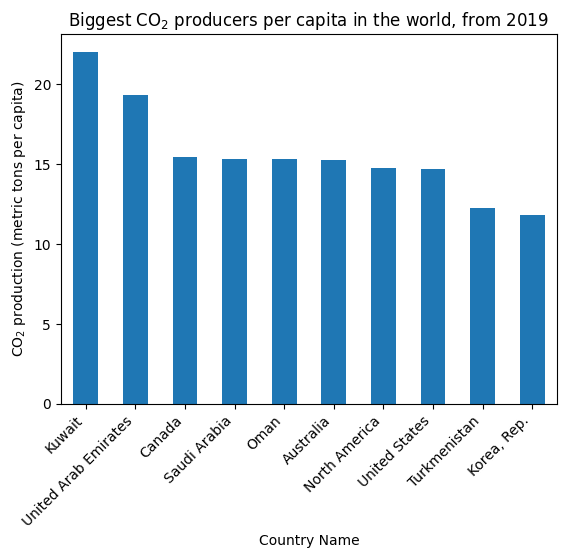

In [21]:
# it does not make sense to create a pie chart of CO2 production per capita
# however, a bar chart can show the results
s = sdg_2019_emissions
n = 10 # show top n countries in bar chart
remaining = s.iloc[n:].sum()  # sum of the remaining entries
s = s.iloc[:n]  # keep only the top n entries
fig, ax = plt.subplots()
s.plot(kind='bar', rot=45)
plt.ylabel('CO$_2$ production (metric tons per capita)')
plt.title('Biggest CO$_2$ producers per capita in the world, from 2019')
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.show()

------------
## Discussion
This analysis shows the countries with the highest carbon footprint. However, since every analysis is based on data that can be skewed, biased or incomplete, it is important to mention any limitations that would need to be considered into account with presenting this analysis.  

First, data quality. The source of the data is [The World Data Bank](https://data.worldbank.org/) which offers all countries to join the GDDS, General Data Dissemination System. This is "a framework for assessing national statistical systems and promoting improved dissemination and effectiveness that has been developed by the International Monetary Fund (IMF), in close collaboration with the World Bank "[[source]](https://datahelpdesk.worldbank.org/knowledgebase/articles/906534-data-quality-and-effectiveness). This encourages countries to improve the quality of their statistics. It is important to keep in mind that not all countries have joint the GDDS and the data quality in the "Sustainable development goals" and "Population estimates and projections" datasets can therefore vary country to country. Here, data quality can depend on the willingness of countries to invest money into data infrastructure and also the willingness to share the data with the world, which may be influenced by many factors including ones such as geopolitics. Also, data quality also depends on the methods used to measure and estimate the CO2 emissions which can have a significant impact on the numbers in the analysis.  

Second, it depends whether countries reported their direct carbon dioxide emissions, or whether they included other greenhouse gases emissions, then converted them into CO2 equivalents and reported them as CO2 emissions. Both approaches are commonly used in climate science, but emissions given in CO2 equivalents (CO2e) normally give us a more thorough outlook which is important especially with having the temperature-emissions relationship in mind. Although data descriptions should be given to countries when they are asked to provide their statistics, errors mistaking CO2 with CO2e sometimes happen and could influence the reported emissions of some countries.

-----------
## Conclusion
In conclusion, the world produced as much as 34,6 billion tons of carbon dioxide greenhouse gas in 2019. More than **30% of all CO2 emissions** were generated by a single country, **China**. Perhaps it is not much surprising given that China produces more than [50% of the global textile and apparel items](https://www.statista.com/statistics/1106909/china-global-production-share-by-industry/). However, the largest production of CO2 also shows the largest opportunity to place in laws and regulations with the aim to reduce emissions. The second largest producer is the **USA, with 14% of all CO2 emissions**, also ranking on the fifth place in the emissions per inhabitant. The next in the list is the highly populated country of **India, with 7% of CO2 emissions** although relatively low emissions per inhabitant. The top 5 list ends with the **Russian Federation (4,9% CO2 production)** and **Japan (3% CO2 production)**.  

This analysis identifies countries that have the highest carbon footprint in the world, making them the most urgent places to introduce innovations and regulations to become carbon neutral to avoid the global climate crisis in the near future.

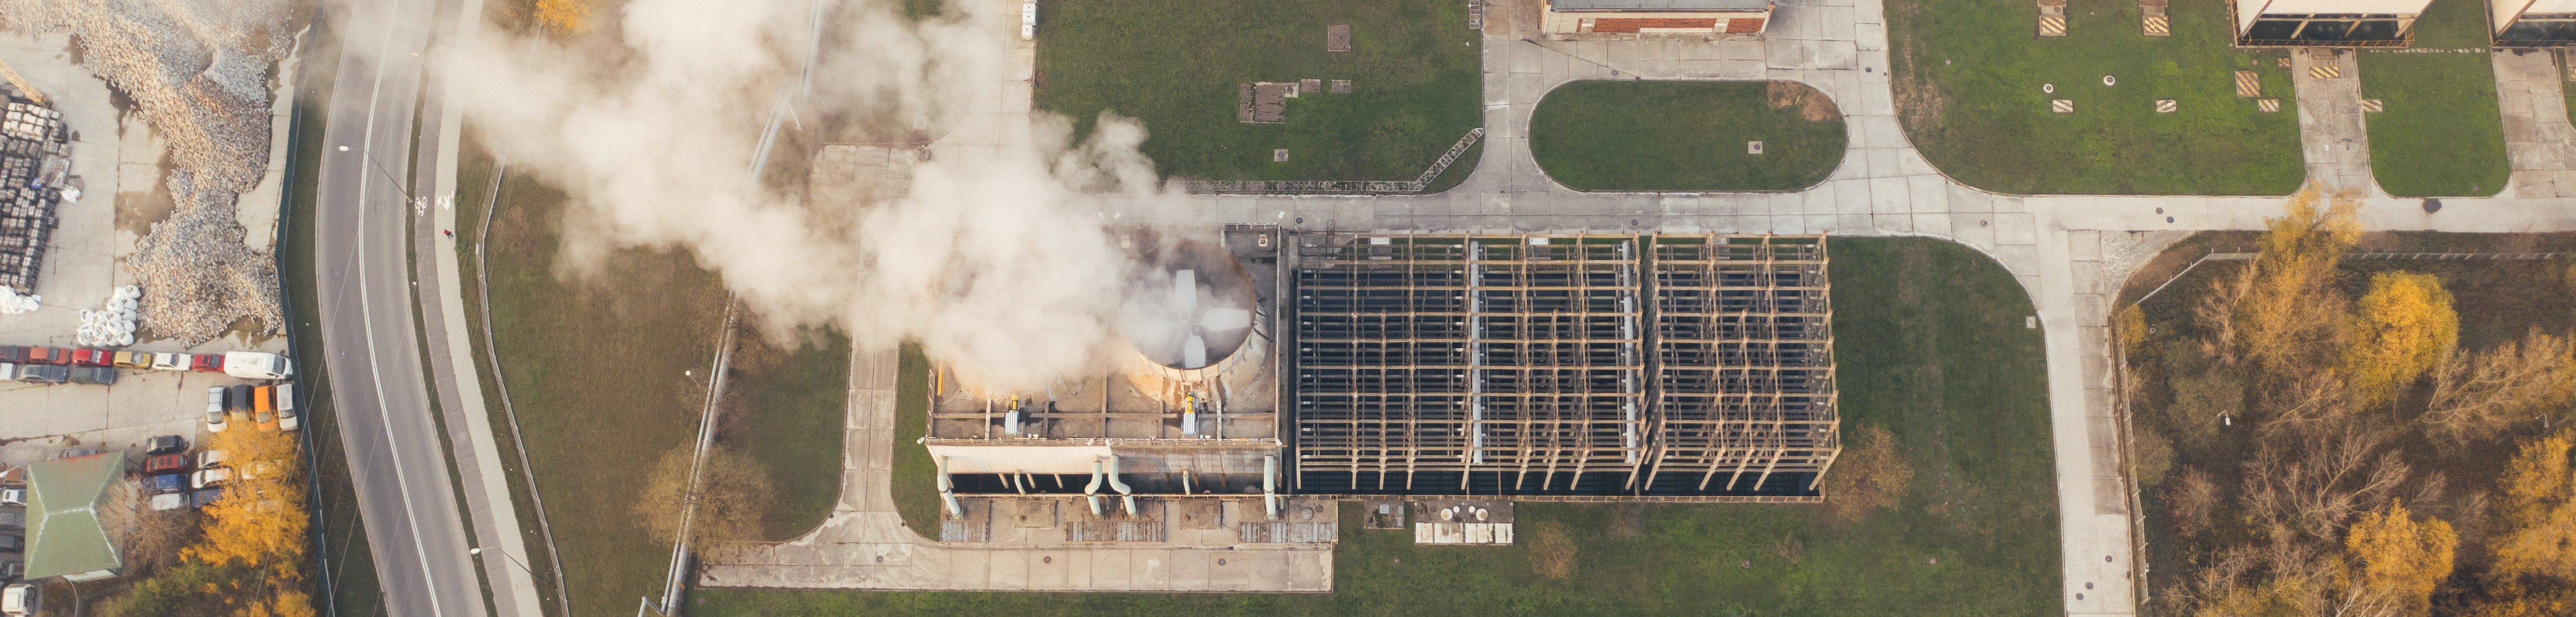